# Sentiment Analysis
- dataset: Amazon fine food reviews

baselines:

1. VADER - bag of words method
2. Roberta Pretrained Model from 🤗 (Hunging Face)
3. Huggingface Pipeline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('ggplot') # R style

In [3]:
import nltk

In [4]:
path = 'D:/Users/pc/Documents/VscodeFiles/dataset/NLP projects/Reviews.csv'
df = pd.read_csv(path)

In [5]:
df.head()
# id product_id user_id profile_name ...

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
# we are focus on text
df.Text.values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [9]:
df.shape

(568454, 10)

In [10]:
# OPTION!!!
# we select 500 rows for initial
df = df.head(500)

# EDA

In [11]:
df.Score.value_counts()

Score
5    339
4     70
3     37
1     36
2     18
Name: count, dtype: int64

In [13]:
df.Score.value_counts().sort_index() # star from 1 to 5 asc

Score
1     36
2     18
3     37
4     70
5    339
Name: count, dtype: int64

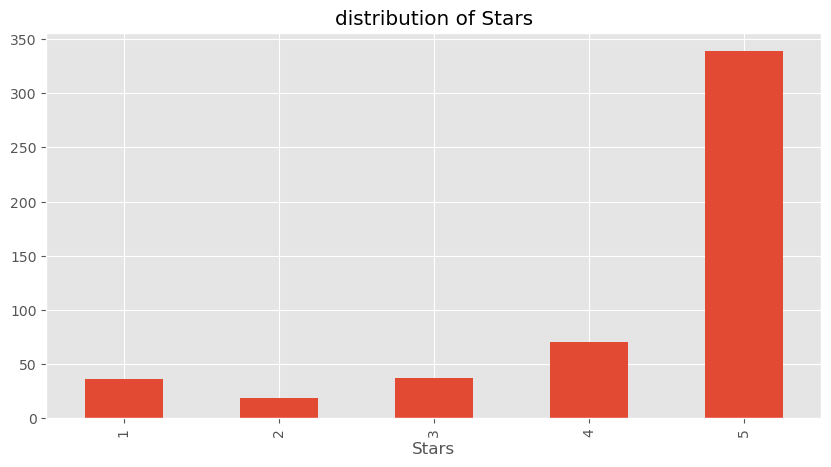

In [15]:
ax = df.Score.value_counts().sort_index().plot( # series.plot(params)
    kind='bar',
    title='distribution of Stars',
    figsize=(10, 5)
)
ax.set_xlabel('Stars')
plt.show()

# Basic NLTK

In [16]:
# take example text
example = df.Text[49]
example

'This is the same stuff you can buy at the big box stores.  There is nothing healthy about it.  It is just carbs and sugars.  Save your money and get something that at least has some taste.'

In [18]:
# change text into tokens using NLTK
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'is', 'the', 'same', 'stuff', 'you', 'can', 'buy', 'at', 'the']

In [20]:
# get pos of these tokens 
tagged = nltk.pos_tag(tokens)
tagged[:5]

[('This', 'DT'), ('is', 'VBZ'), ('the', 'DT'), ('same', 'JJ'), ('stuff', 'NN')]

In [26]:
# ??? can not print directly

# nltk.download('maxent_ne_chunker')
# nltk.download('words')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('punkt')

# this is a tree structure

entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  is/VBZ
  the/DT
  same/JJ
  stuff/NN
  you/PRP
  can/MD
  buy/VB
  at/IN
  the/DT
  big/JJ
  box/NN
  stores/NNS
  ./.
  There/EX
  is/VBZ
  nothing/NN
  healthy/JJ
  about/IN
  it/PRP
  ./.
  It/PRP
  is/VBZ
  just/RB
  carbs/JJ
  and/CC
  sugars/NNS
  ./.
  Save/VB
  your/PRP$
  money/NN
  and/CC
  get/VB
  something/NN
  that/WDT
  at/IN
  least/JJS
  has/VBZ
  some/DT
  taste/NN
  ./.)


# Baselien1: VADER(Valance Aware Dictionary and Entiment Reasoner)

- bag of words method

1. stop words are removed
2. each word is scored and combined to a total score